In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

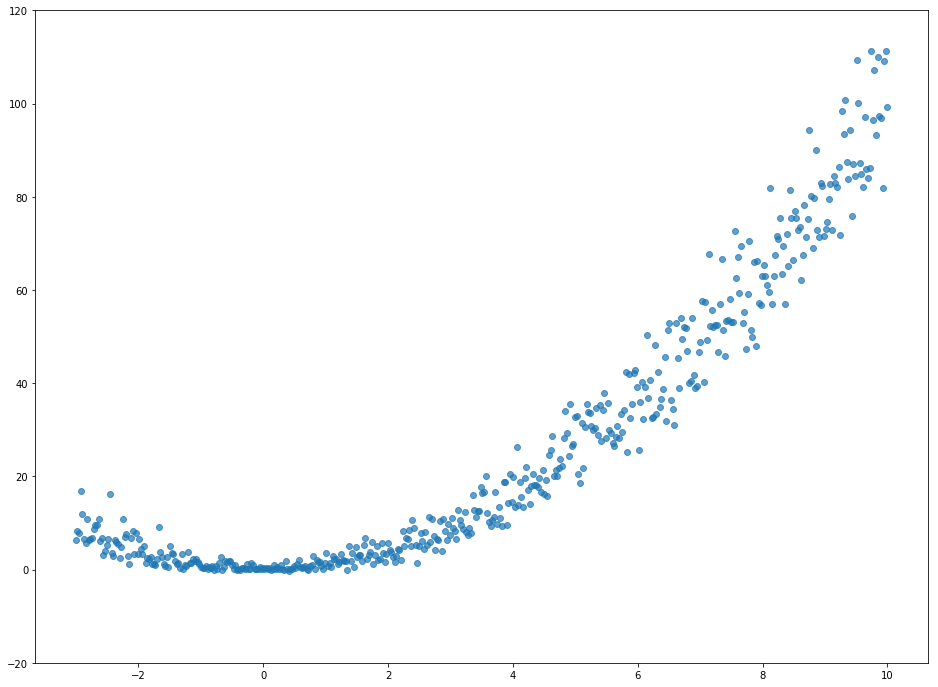

In [2]:
# 데이터셋 구성
np.random.seed(20)
x_data = np.reshape(np.linspace(-3, 10, 500), [-1,1])
y_data = (x_data +0.5 *np.random.normal(size=[500,1]))**2 -\
0.1 * np.random.normal(size=[500,1])

plt.figure(figsize=(16,12))
plt.ylim(-20,120)
_ = plt.plot(x_data, y_data, "o", alpha=0.7)

In [3]:
# 학습데이터와 테스트데이터 구분(비율 7:3)

x_train, x_test, y_train, y_test = \
train_test_split(x_data, y_data, test_size= 0.3, random_state=10)

## Regression with Multilayer Perceptron

![](data/mlp.png)

- Input layer & output layer
- 2 hidden layer

In [4]:
tf.set_random_seed(10)

# MLP 모델 구성
X = tf.placeholder(tf.float32, shape=[None,1])
Y = tf.placeholder(tf.float32, shape=[None,1])

W0 = tf.Variable(tf.random_normal([1,10]), dtype=tf.float32)
b0 = tf.Variable(tf.random_normal([10]), dtype=tf.float32)

H0 = tf.sigmoid(tf.matmul(X,W0)+b0)

W1 = tf.Variable(tf.random_normal([10,10]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([10]), dtype=tf.float32)

H1 = tf.sigmoid(tf.matmul(H0,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,1]), dtype=tf.float32)
b2 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

H = tf.matmul(H1,W2)+b2

In [5]:
loss = tf.reduce_mean(tf.square(H-Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(loss)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

Step : 5000, Cost : 146.101
Step : 10000, Cost : 40.0056
Step : 15000, Cost : 57.2443
Step : 20000, Cost : 62.0727
Step : 25000, Cost : 33.4872
Step : 30000, Cost : 33.053
Step : 35000, Cost : 32.6033
Step : 40000, Cost : 38.7716
Step : 45000, Cost : 28.9507
Step : 50000, Cost : 32.3774


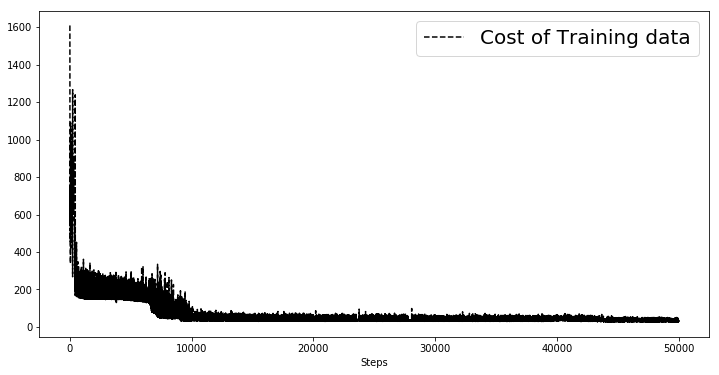

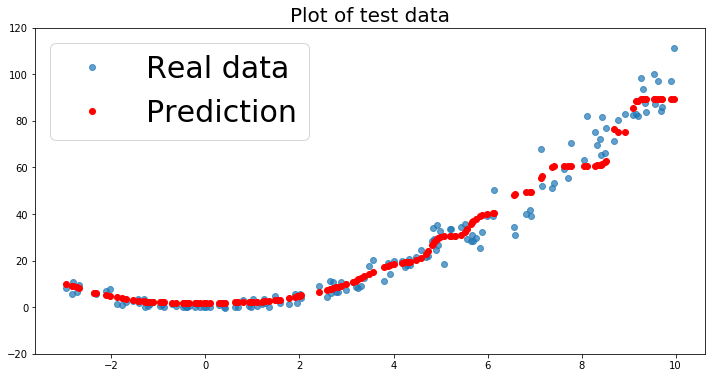

In [6]:
# 학습횟수: 50,000번

l_cost = []
iteration = 50000
for step in range(iteration):
    _, cost = sess.run([train, loss], 
                       feed_dict={X: x_train, Y: y_train})
    l_cost.append(cost)
    if (step+1) % (iteration//10) ==0 :
        print("Step : %i, Cost : %s" %((step+1), cost))


plt.figure(figsize=(12,6))
plt.xlabel("Steps")
_ = plt.plot(l_cost, "k--", label='Cost of Training data')
_ = plt.legend(fontsize=20)

# 학습한 모델을 테스트 데이터에 적용

y_pred = sess.run(H, feed_dict={X: x_test})
plt.figure(figsize=(12,6))
plt.ylim(-20,120)
plt.title("Plot of test data", fontsize=20)
_ = plt.plot(x_test, y_test, "o", alpha=0.7, label="Real data")
_ = plt.plot(x_test, y_pred, "ro", label="Prediction")
_ = plt.legend(fontsize=30)

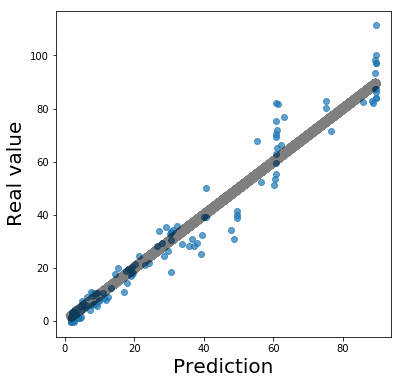

In [7]:
plt.figure(figsize=(6,6))
plt.xlabel("Prediction",fontsize=20)
plt.ylabel("Real value",fontsize=20)
_ = plt.plot(y_pred, y_test, "o", alpha=0.7)
_ = plt.plot(y_pred, y_pred, "k-",linewidth=10, alpha=0.5)